In [10]:
import numpy
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

In [11]:
sr = 22050 # sample rate
T = 2.0    # seconds
f = 220    # 220 Hz
# time variable
t = numpy.linspace(0, T, int(T*sr), endpoint=False)
#wave = 0.5*numpy.sin(2 * numpy.pi * f * t)
wave = signal.sawtooth(2 * numpy.pi * f * t)

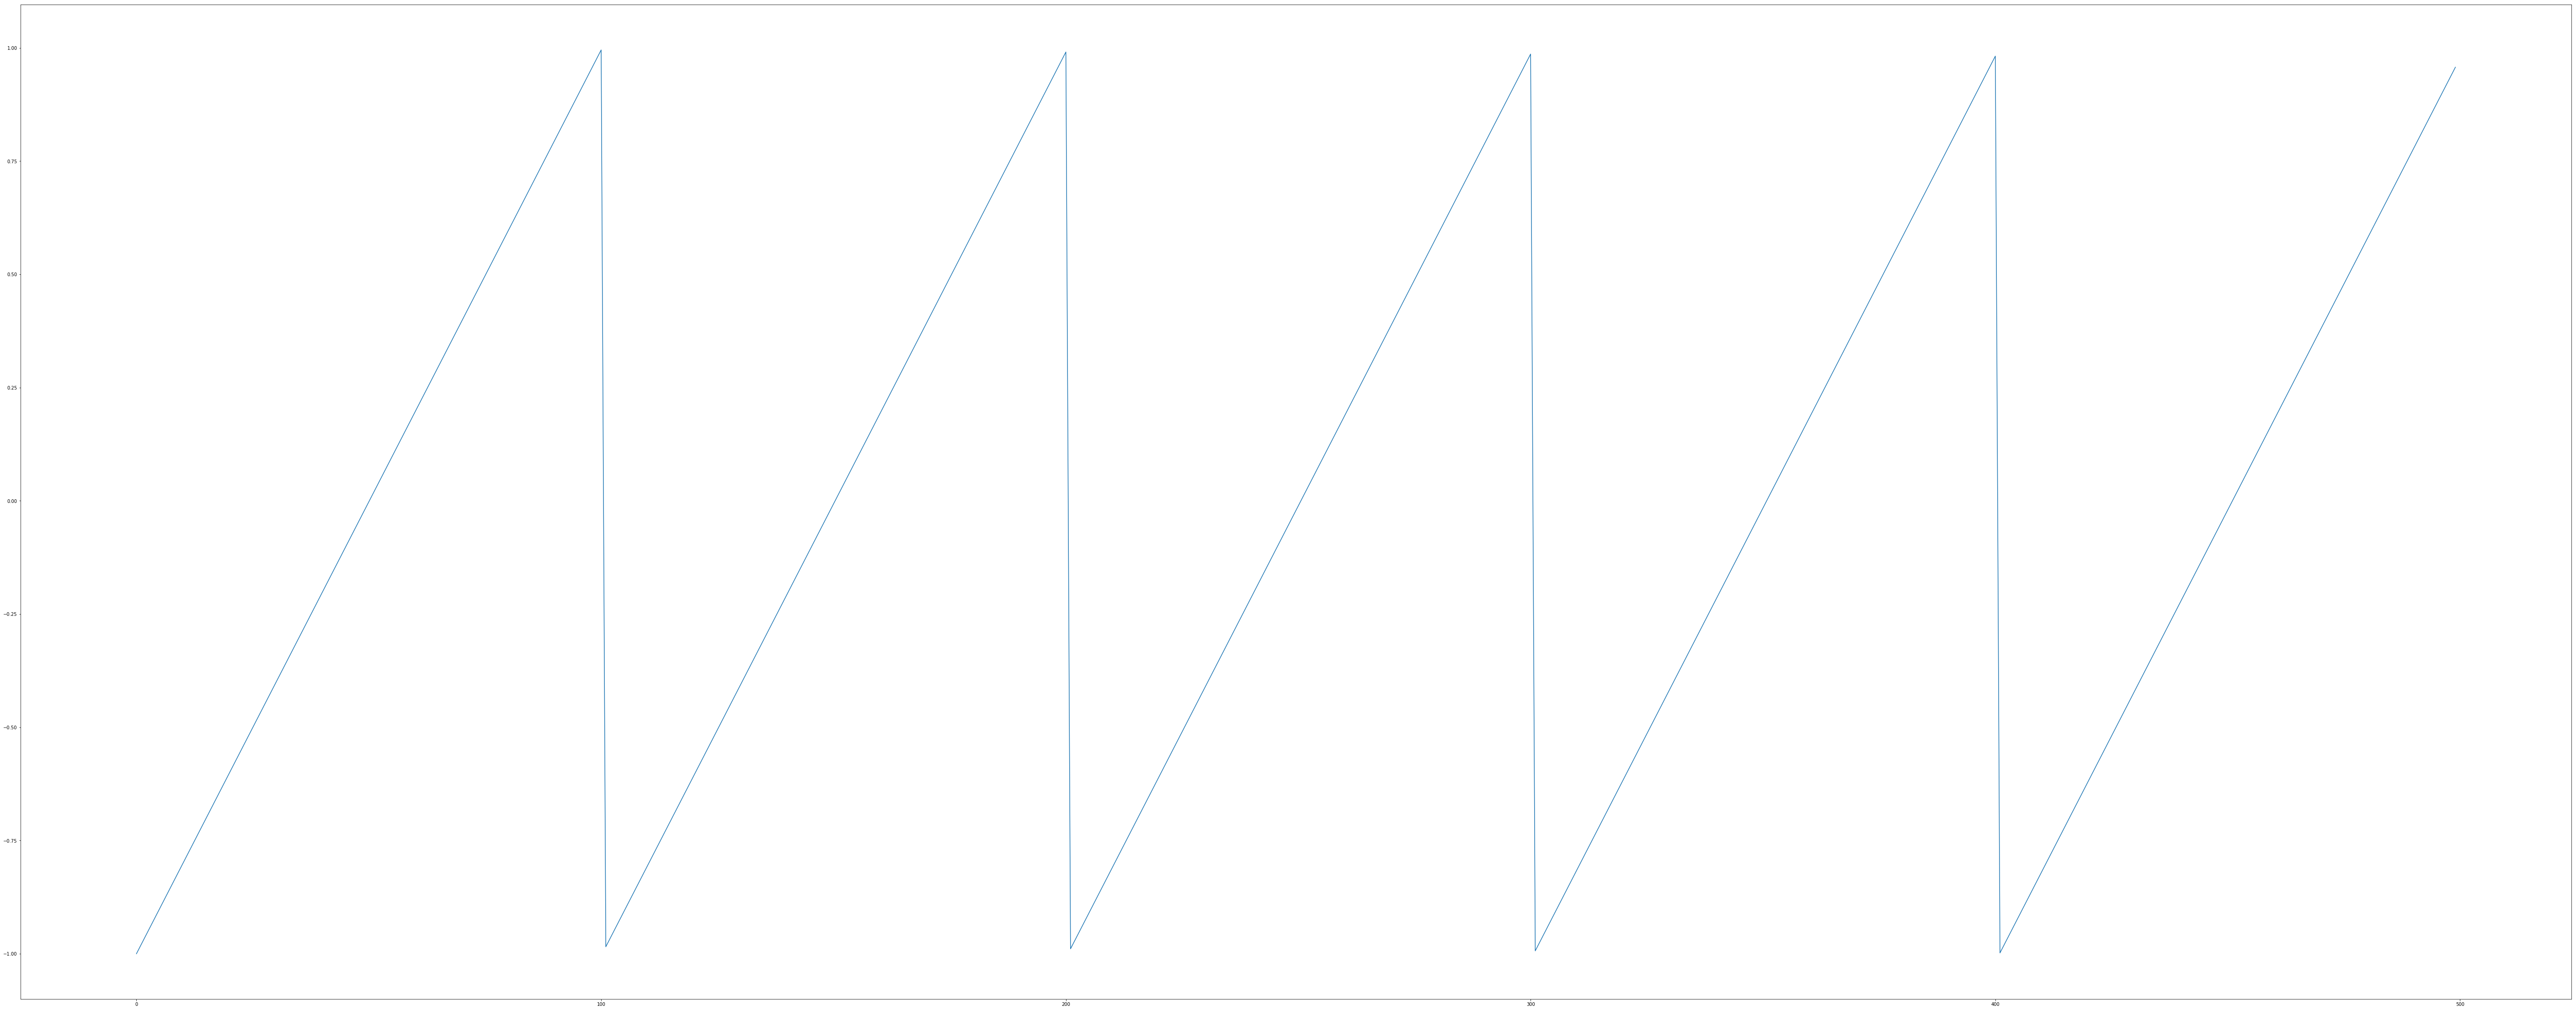

In [12]:
plt.figure(figsize=(100, 40))
plt.plot(wave[:500])
plt.show()

In [13]:
ipd.Audio(wave, rate=sr) # load a NumPy array

> from musicsp.org

A typical "waveshaper" is some function which takes an input sample value X and transforms it to an output sample X'. A typical implementation would be a look-up table of some number of points, and some level of interpolation between those points (say, cubic). When people talk about a wave shaper, this is most often what they mean. Note that a wave shaper, as opposed to a filter, does not have any state. The mapping from X -> X' is stateless.

Some wave shapers are implemented as polynomials, or using other math 
functions. Hard clipping is a wave shaper implemented using the min() and max() functions (or the three-argument clamp() function, which is the same thing). A very mellow and musical-sounding distortion is implemented using  a third-degree polynomial; something like X' = (3/2)X - (1/2)X^3. The nice thing with polynomial wave shapers is that you know that the maximum they will expand bandwidth is their order. Thus, you need to oversample 3x to make sure that a third-degree polynomial is aliasing free. With a lookup table based wave shaper, you don't know this (unless you treat an N-point table as an N-point polynomial :-)

In [19]:
def dist(x):
    return 1.5 * x - 0.5 * x * x * x

v_dist = numpy.vectorize(dist)
d_wave = v_dist(wave)

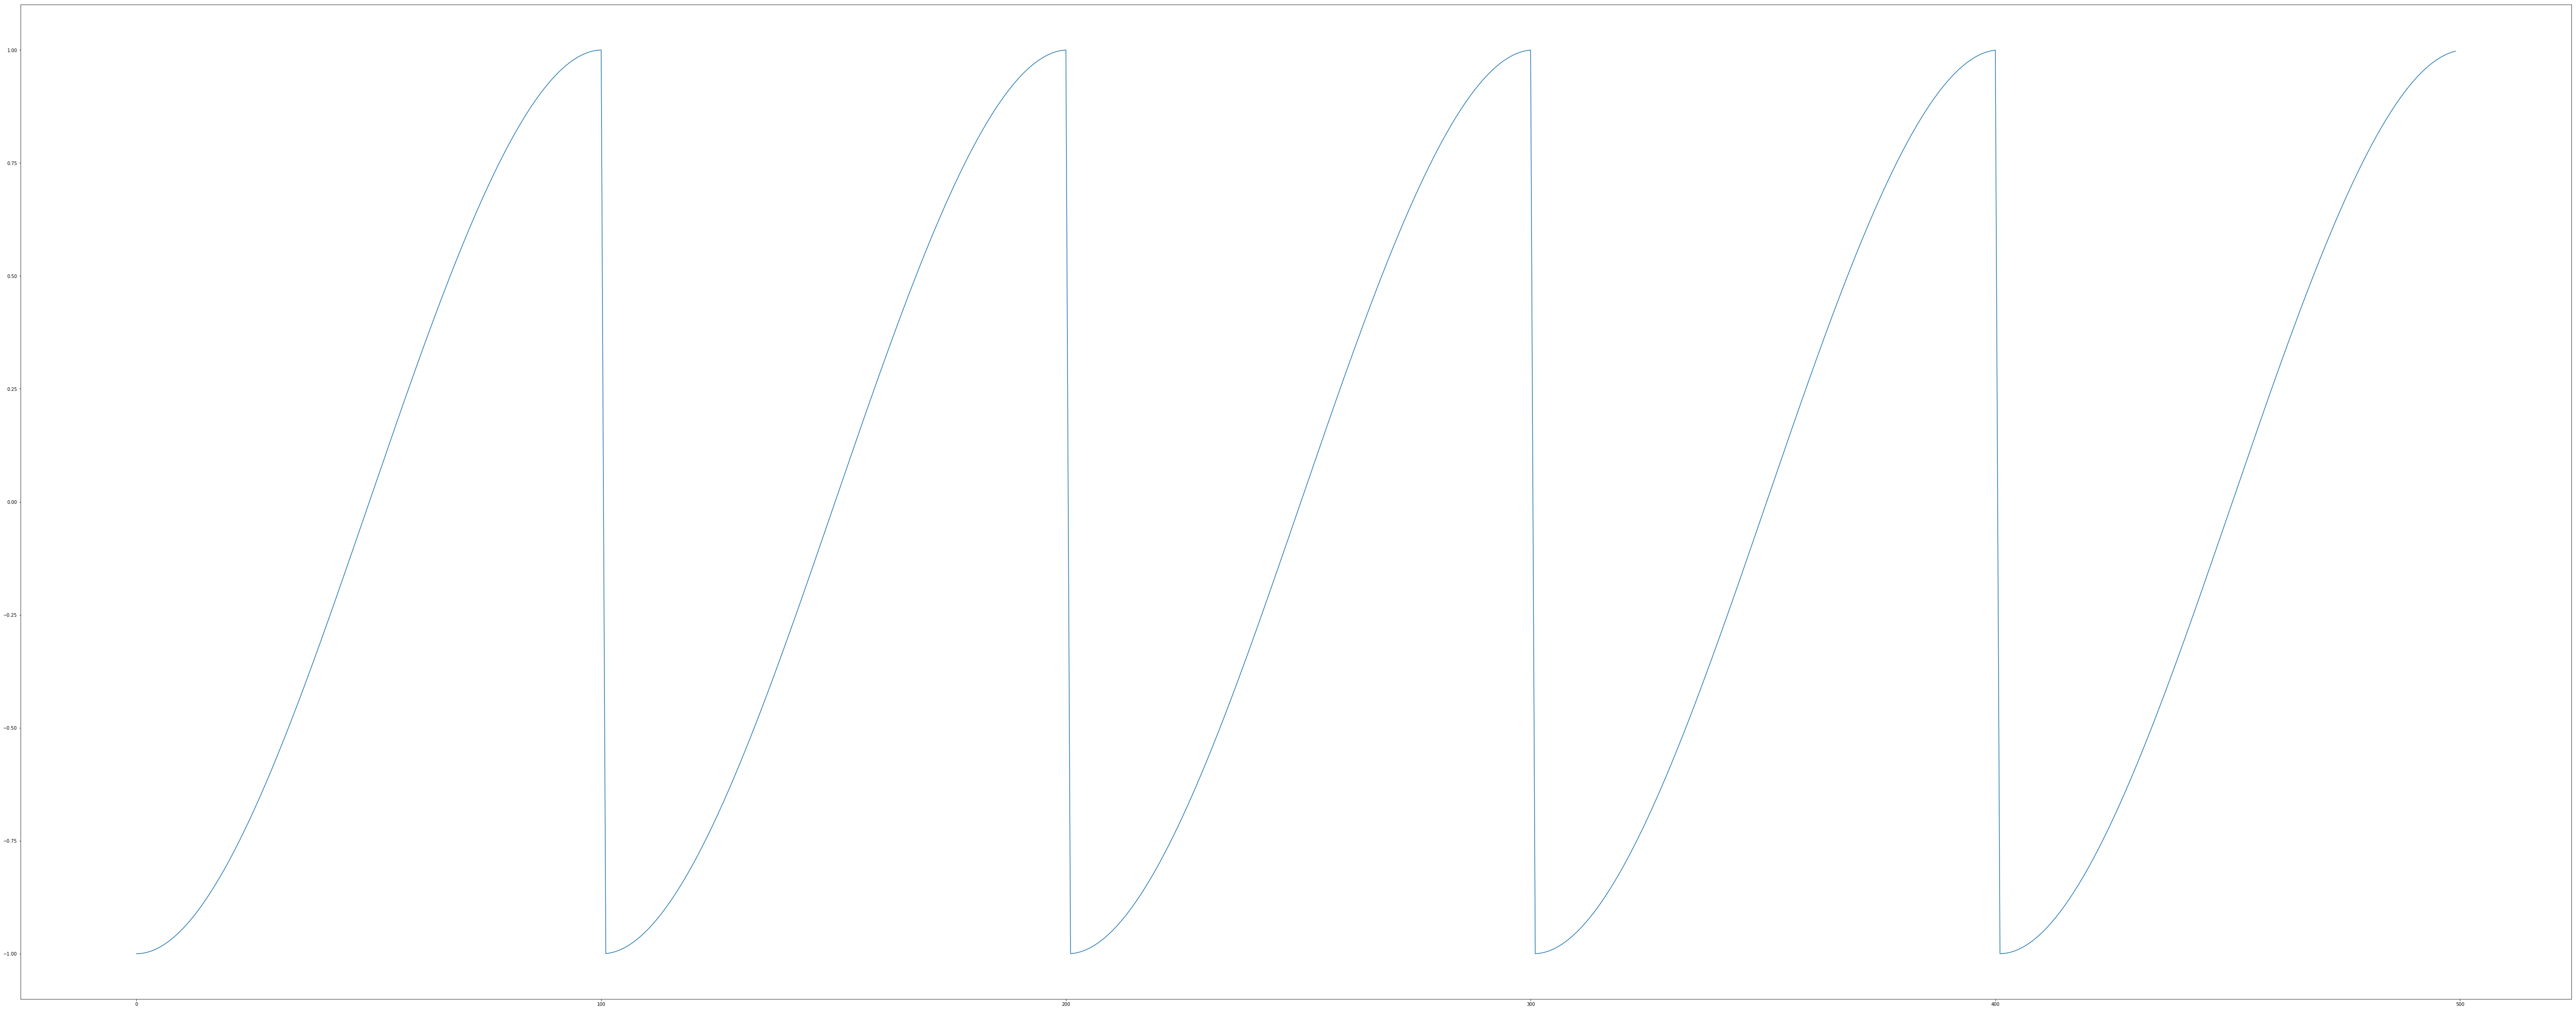

In [20]:
plt.figure(figsize=(100, 40))
plt.plot(d_wave[:500])
plt.show()

In [21]:
ipd.Audio(d_wave, rate=sr) # load a NumPy array